# About Dataset 

**Link**: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset  

**Context**   
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.

**Can you predict if the customer is going to honor the reservation or cancel it ?**

**Data Dictionary **
1. Booking_ID: unique identifier of each booking
2. no_of_adults: Number of adults
3. no_of_children: Number of Children
4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan: Type of meal plan booked by the customer:
7. required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
8. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
9. lead_time: Number of days between the date of booking and the arrival date
10. arrival_year: Year of arrival date
11. arrival_month: Month of arrival date
12. arrival_date: Date of the month
13. market_segment_type: Market segment designation.
14. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
15. no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
16. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
17. avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
18. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
19. booking_status: Flag indicating if the booking was canceled or not.

# Imports

In [355]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Reading Data And Data Exploring 

In [356]:
hotel_data = pd.read_csv("Hotel Reservations.csv")

In [357]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Quick Note  
I will drop firstly booking id - this feature should means nothing for our model. It's just an id of a transaction.

In [358]:
hotel_data.drop("Booking_ID", axis = 1, inplace = True)

In [359]:
hotel_data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [360]:
len(hotel_data)

36275

In [361]:
hotel_data.isna().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [362]:
hotel_data = pd.read_csv("Hotel Reservations.csv")
hotel_data.drop("Booking_ID", axis = 1, inplace = True)
df_temp = hotel_data

### Quick note  
1 = Not_Canceled  
0 = Canceled

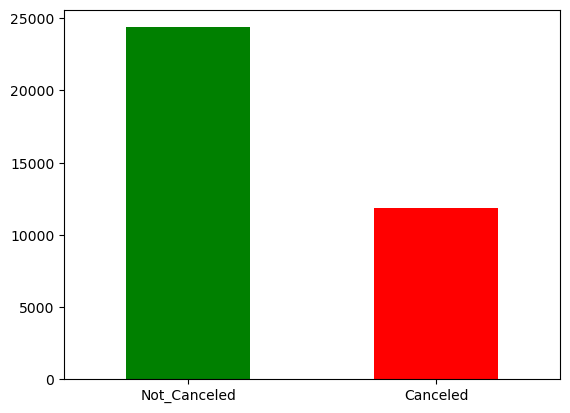

In [363]:
df_temp["booking_status"].value_counts().plot(kind = "bar", color = ['green', 'red'])
plt.xticks(rotation = 0);

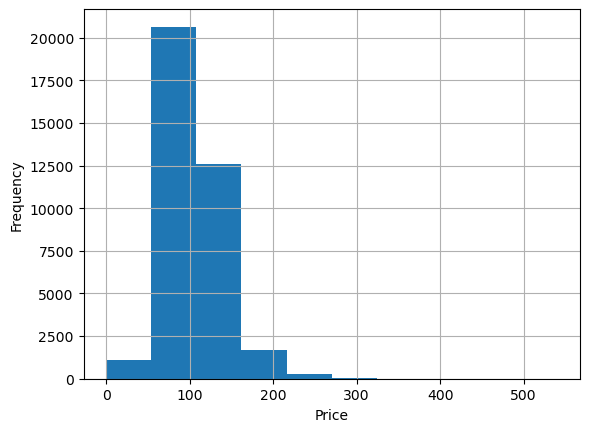

In [364]:
df_temp["avg_price_per_room"].hist();
plt.ylabel("Frequency")
plt.xlabel("Price");

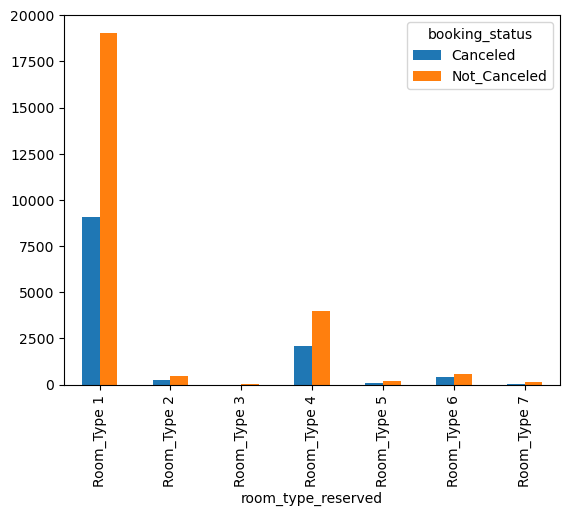

In [365]:
pd.crosstab(df_temp["room_type_reserved"], df_temp["booking_status"]).plot(kind = "bar");

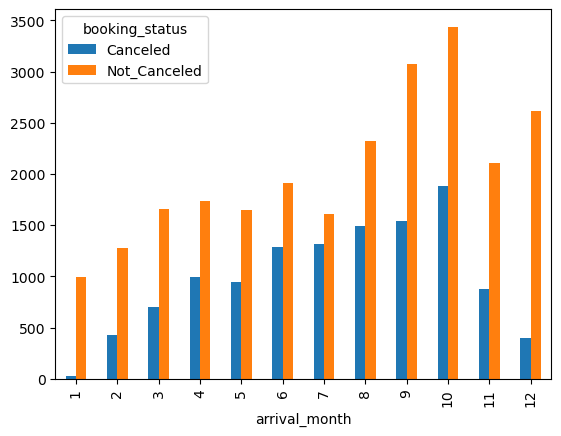

In [366]:
pd.crosstab(df_temp["arrival_month"], df_temp["booking_status"]).plot(kind = "bar");

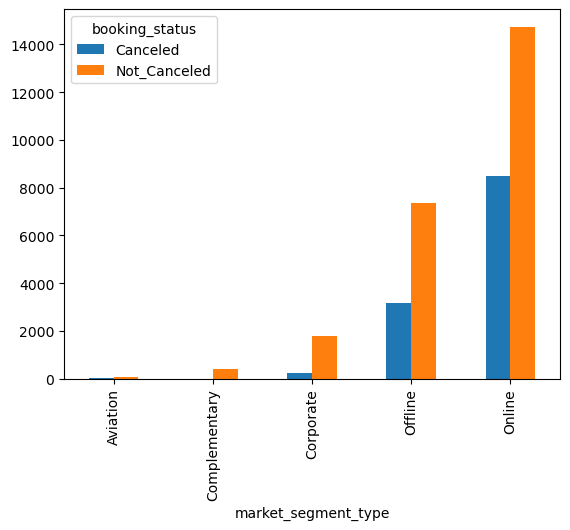

In [367]:
pd.crosstab(df_temp["market_segment_type"], df_temp["booking_status"]).plot(kind = "bar");

# Modelling And Preprocessing Data

In [368]:
np.random.seed(42)
one_hot = OneHotEncoder()
le = LabelEncoder()
df_temp["booking_status"] = le.fit_transform(df_temp['booking_status'])

df_temp = df_temp.sample(frac = 1)

X = df_temp.drop("booking_status", axis = 1)
y = df_temp["booking_status"]

cat_feat = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
transformer = ColumnTransformer([("one_hot", one_hot, cat_feat)])
transformed_X = transformer.fit_transform(X)


In [369]:
transformed_X

<36275x16 sparse matrix of type '<class 'numpy.float64'>'
	with 108825 stored elements in Compressed Sparse Row format>

In [370]:
np.random.seed(42)
X_test, y_test = transformed_X[:1800], y[:1800]
X_train, X_val, y_train, y_val = train_test_split(transformed_X[1800:], y[1800:])

C:\Users\Młody\AppData\Local\Temp\ipykernel_11116\3721868390.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_test, y_test = transformed_X[:1800], y[:1800]
C:\Users\Młody\AppData\Local\Temp\ipykernel_11116\3721868390.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train, X_val, y_train, y_val = train_test_split(transformed_X[1800:], y[1800:])


In [371]:
def train_models(models: dict, X_train, X_val, X_test, y_train, y_val, y_test):
    best_model = 0
    name = ''
    model = 0
    for label, model in models.items():
        print("Processing:", label)
        model.fit(X_train, y_train)
        
        print("Score:", model.score(X_val, y_val))
        if best_model < model.score(X_val, y_val):
            best_model = model.score(X_val, y_val)
            name = label
            model = model
        
        y_preds = model.predict(X_test)
        print(classification_report(y_test, y_preds))
        
        ConfusionMatrixDisplay.from_predictions(y_test, y_preds)
        plt.show()
    
    return name, model
    

In [372]:
models = {
    "LinearSVC": LinearSVC(),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "LogisticRegression": LogisticRegression()
}

Processing: LinearSVC
Score: 0.6778048497505511
              precision    recall  f1-score   support

           0       0.64      0.04      0.08       622
           1       0.66      0.99      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.65      0.51      0.43      1800
weighted avg       0.65      0.66      0.54      1800



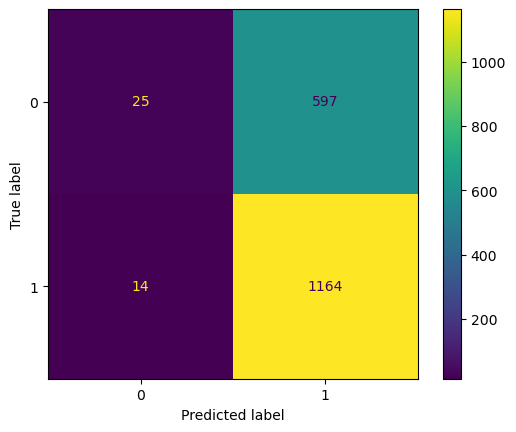

Processing: SVC
Score: 0.678617008933751
              precision    recall  f1-score   support

           0       0.81      0.03      0.06       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.73      0.51      0.43      1800
weighted avg       0.71      0.66      0.54      1800



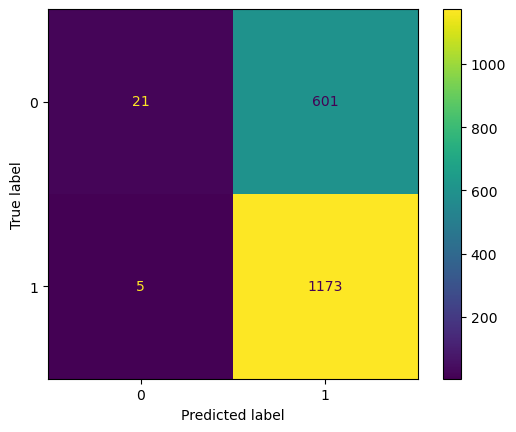

Processing: RandomForest
Score: 0.678617008933751
              precision    recall  f1-score   support

           0       0.81      0.03      0.06       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.73      0.51      0.43      1800
weighted avg       0.71      0.66      0.54      1800



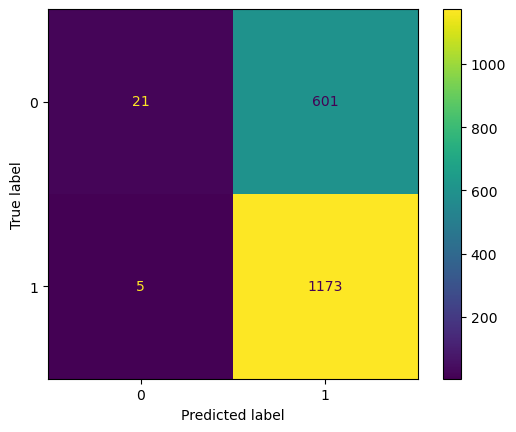

Processing: DecisionTree
Score: 0.678617008933751
              precision    recall  f1-score   support

           0       0.81      0.03      0.06       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.73      0.51      0.43      1800
weighted avg       0.71      0.66      0.54      1800



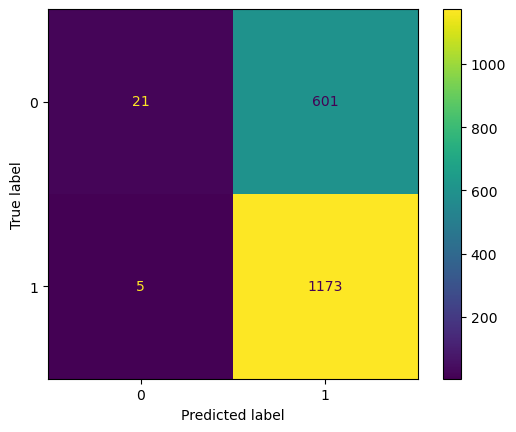

Processing: LogisticRegression
Score: 0.6778048497505511
              precision    recall  f1-score   support

           0       0.64      0.04      0.08       622
           1       0.66      0.99      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.65      0.51      0.43      1800
weighted avg       0.65      0.66      0.54      1800



D:\ProgramingALL\HotelPredictionProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


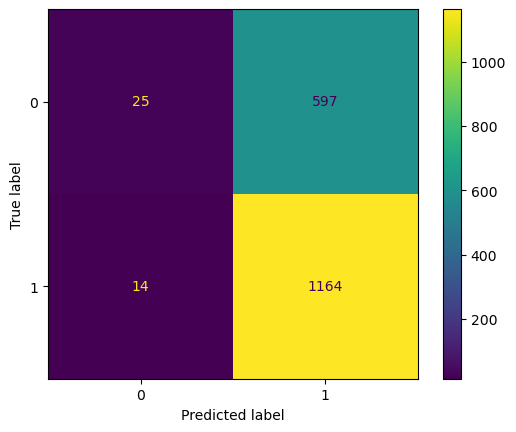

'SVC'

In [373]:
best_model, model = train_models(models, X_train, X_val, X_test, y_train, y_val, y_test)
best_model

### Try with categoric labels

In [374]:
X = df_temp
X["type_of_meal_plan"] = le.fit_transform(X['type_of_meal_plan'])
X["room_type_reserved"] = le.fit_transform(X['room_type_reserved'])
X["market_segment_type"] = le.fit_transform(X['market_segment_type'])

y = X["booking_status"]
X = X.drop("booking_status", axis = 1)




np.random.seed(5)
X_test, y_test = transformed_X[:1800], y[:1800]
X_train, X_val, y_train, y_val = train_test_split(transformed_X[1800:], y[1800:])

C:\Users\Młody\AppData\Local\Temp\ipykernel_11116\2926103984.py:13: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_test, y_test = transformed_X[:1800], y[:1800]
C:\Users\Młody\AppData\Local\Temp\ipykernel_11116\2926103984.py:14: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_train, X_val, y_train, y_val = train_test_split(transformed_X[1800:], y[1800:])


Processing: LinearSVC
Score: 0.6752523494604943
              precision    recall  f1-score   support

           0       0.64      0.04      0.08       622
           1       0.66      0.99      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.65      0.51      0.43      1800
weighted avg       0.65      0.66      0.54      1800



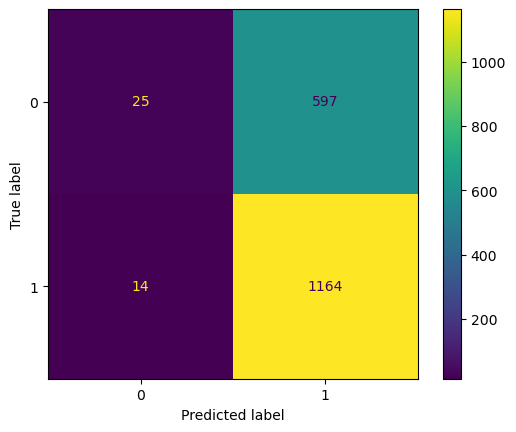

Processing: SVC
Score: 0.6761805313841512
              precision    recall  f1-score   support

           0       0.81      0.03      0.06       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.73      0.51      0.43      1800
weighted avg       0.71      0.66      0.54      1800



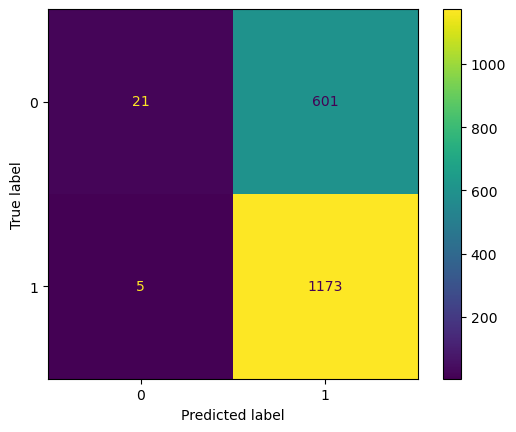

Processing: RandomForest
Score: 0.6761805313841512
              precision    recall  f1-score   support

           0       0.81      0.04      0.07       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.74      0.52      0.43      1800
weighted avg       0.71      0.66      0.54      1800



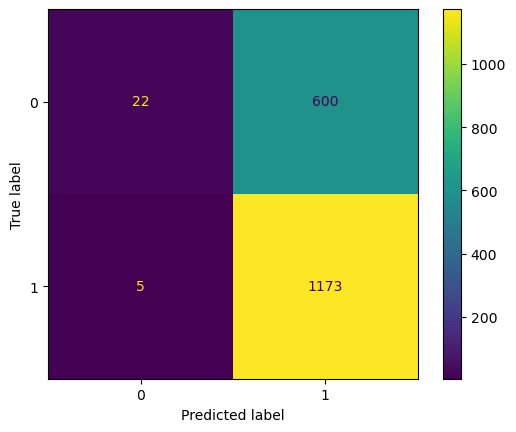

Processing: DecisionTree
Score: 0.6761805313841512
              precision    recall  f1-score   support

           0       0.81      0.04      0.07       622
           1       0.66      1.00      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.74      0.52      0.43      1800
weighted avg       0.71      0.66      0.54      1800



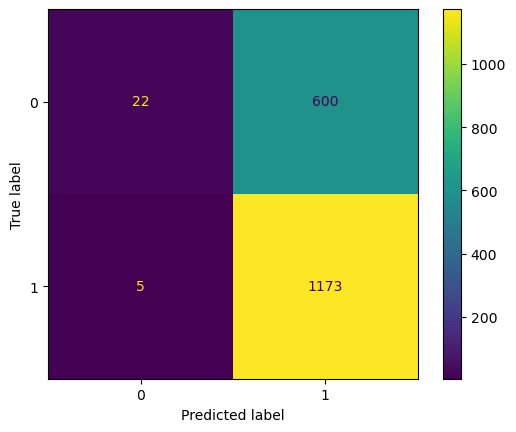

Processing: LogisticRegression
Score: 0.6752523494604943
              precision    recall  f1-score   support

           0       0.64      0.04      0.08       622
           1       0.66      0.99      0.79      1178

    accuracy                           0.66      1800
   macro avg       0.65      0.51      0.43      1800
weighted avg       0.65      0.66      0.54      1800



D:\ProgramingALL\HotelPredictionProject\env\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


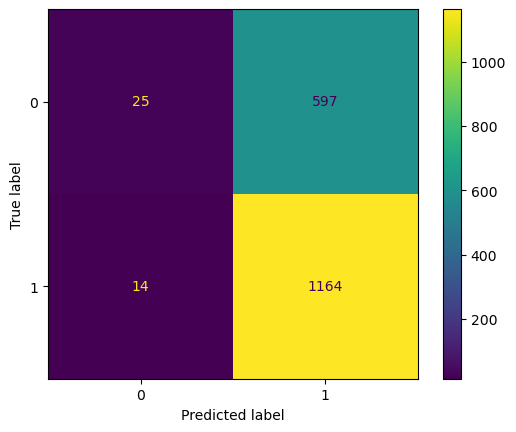

In [375]:
best_model_cat, model_cat = train_models(models, X_train, X_val, X_test, y_train, y_val, y_test)

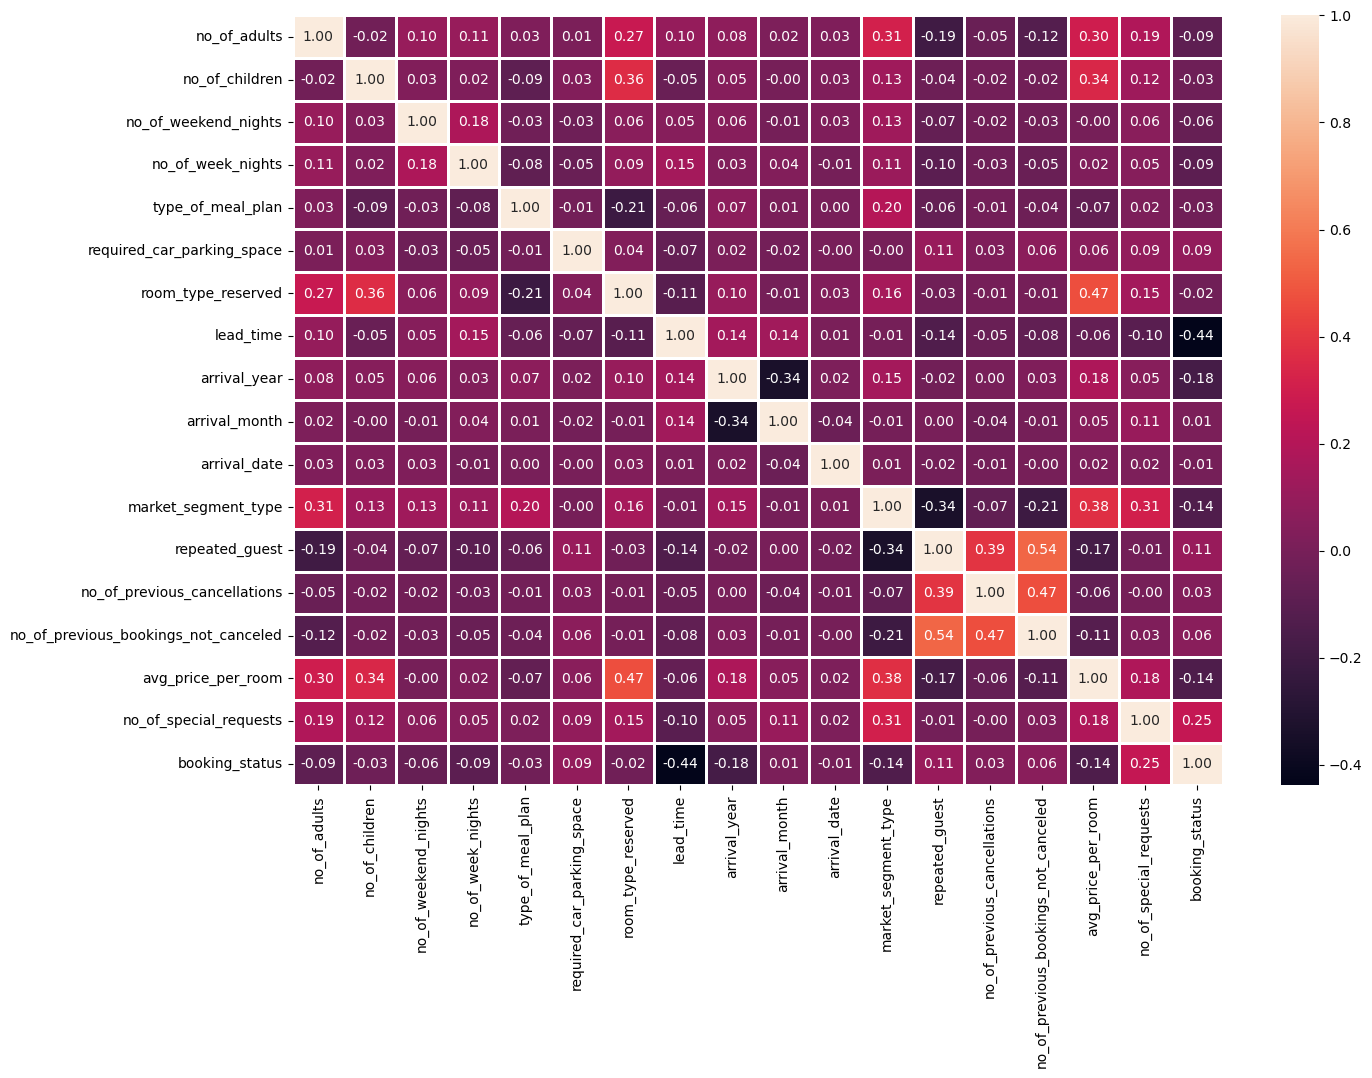

In [376]:
corr = df_temp.corr()
plt.figure(figsize = (15, 10))
sns.heatmap(corr,
            annot = True,
            linewidths = 2,
            fmt = "0.2f");

<BarContainer object of 16 artists>

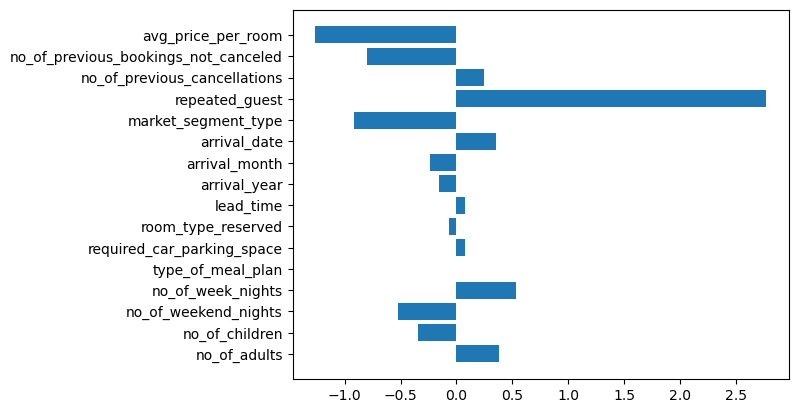

In [393]:
plt.barh(df_temp.columns[:16], model.coef_[0])